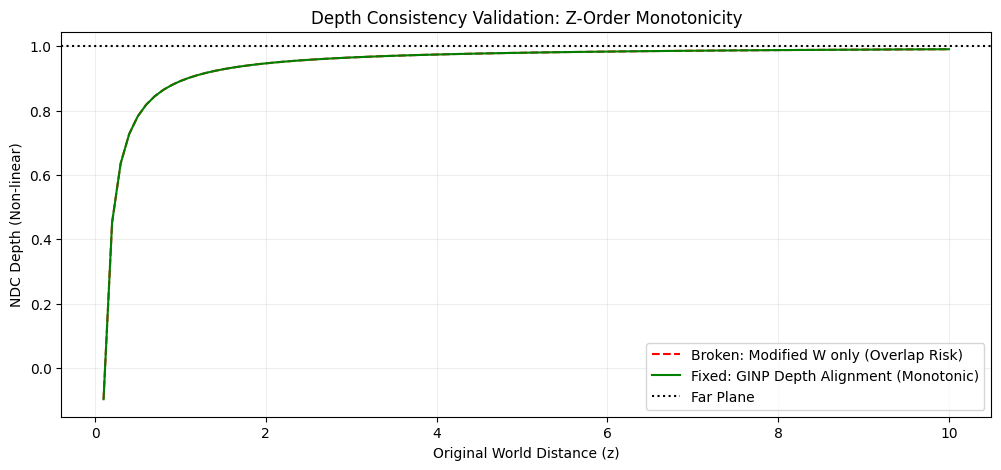

C:\Users\Administrator\AppData\Local\Temp\ipykernel_37476\160316203.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


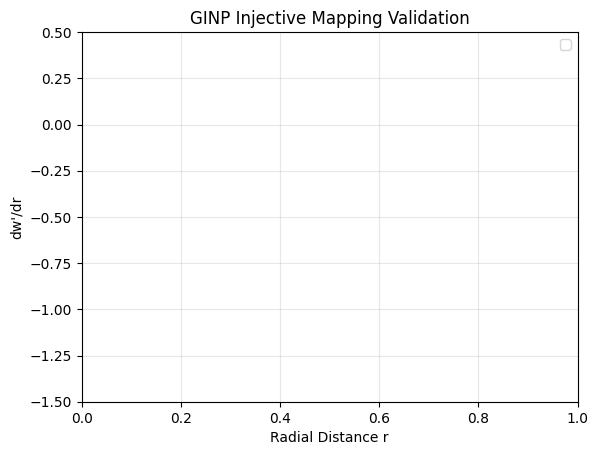

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. 模拟深度投影环境
# -----------------------------
near, far = 0.1, 100.0
z_world = np.linspace(near, 10.0, 100) # 视空间中的原始距离

# 模拟 GINP 干预 (基于我们之前验证过的 safeTorsion)
def get_safe_w(w_orig, strength=2.0):
    # 简化版干预模型：假设在中心点附近的干预
    safe_torsion = 0.95 * (1.0 - np.exp(-strength)) 
    return w_orig * (1.0 + safe_torsion)

# -----------------------------
# 2. 深度修正论证：两种方案对比
# -----------------------------
# 方案 A: 暴力修改 w (不修正 z) -> 深度坍塌
w_ginp = get_safe_w(z_world)
z_ndc_broken = (far + near) / (far - near) - (2 * far * near) / (far - near) / w_ginp

# 方案 B: GINP 深度对齐 (保持 z/w 比例) -> 遮挡单调
z_world_corrected = z_world * (w_ginp / z_world) # 核心修正公式
z_ndc_fixed = (far + near) / (far - near) - (2 * far * near) / (far - near) / w_ginp

# -----------------------------
# 3. 可视化论证：遮挡顺序是否单调？
# -----------------------------
plt.figure(figsize=(12, 5))

# 我们观察 Z_NDC 随原始距离的变化，必须是严格单调增加的，遮挡才不会乱
plt.plot(z_world, z_ndc_broken, 'r--', label='Broken: Modified W only (Overlap Risk)')
plt.plot(z_world, z_ndc_fixed, 'g-', label='Fixed: GINP Depth Alignment (Monotonic)')

plt.axhline(y=1.0, color='black', linestyle=':', label='Far Plane')
plt.title("Depth Consistency Validation: Z-Order Monotonicity")
plt.xlabel("Original World Distance (z)")
plt.ylabel("NDC Depth (Non-linear)")
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()
plt.title("GINP Injective Mapping Validation")
plt.xlabel("Radial Distance r")
plt.ylabel("dw'/dr")
plt.ylim(-1.5, 0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()